In [33]:
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

from pathlib import Path
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from IPython.display import display, Markdown

In [34]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [35]:
app_train = pd.read_csv(DATASET_DIR / "application_train.csv")
bureau = pd.read_csv(DATASET_DIR / "bureau.csv")
description = pd.read_csv(DATASET_DIR / "HomeCredit_columns_description.csv", encoding="latin", index_col=0)

In [36]:
# Schnittmenge zwischen app_train und bureau
# Ergänzt die Variable "TARGET" in dem bureau-Datensatz
bureau = pd.merge(bureau, app_train[["SK_ID_CURR","TARGET"]] ,on="SK_ID_CURR")

In [37]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,TARGET
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,0
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,0
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,0
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,0
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,0


In [38]:
bureau["CREDIT_TYPE"].value_counts()

Consumer credit                                 1069610
Credit card                                      343853
Car loan                                          23757
Mortgage                                          15607
Microloan                                          9005
Loan for business development                      1721
Another type of loan                                854
Unknown type of loan                                472
Loan for working capital replenishment              377
Real estate loan                                     23
Cash loan (non-earmarked)                            23
Loan for the purchase of equipment                   17
Loan for purchase of shares (margin lending)          4
Mobile operator loan                                  1
Interbank credit                                      1
Name: CREDIT_TYPE, dtype: int64

In [39]:
n_heads = ["CREDIT_ACTIVE", "CREDIT_CURRENCY", "CREDIT_TYPE"]

In [40]:
# transformiert kategorische variablen in integer
for head in n_heads:
    bureau[head], cats = pd.factorize(bureau[head])

In [41]:
y = bureau["TARGET"]
x = bureau.drop(["SK_ID_CURR", "TARGET"], axis=1)

In [42]:
# ersätzt alle np.nan durch 0
x = x.fillna(0)

In [43]:
# unterteilt den trainingsdatensatz in trainings- und validierungsdatensätze
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)

In [44]:
# logistisches Regressionsmodell
model = LogisticRegression(random_state=0, max_iter = 5000)

In [45]:
# Konfidenzlevel der einzelnen Klassen
y_score = model.fit(x_train, y_train).decision_function(x_test)

In [46]:
# Prognosewerte der Testdaten
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
# Prognosewerte der Testdaten in %
x_test_prob = model.predict_proba(x_test)
x_test_prob

array([[0.89817502, 0.10182498],
       [0.92894897, 0.07105103],
       [0.94658444, 0.05341556],
       ...,
       [0.8669636 , 0.1330364 ],
       [0.99224612, 0.00775388],
       [0.90857608, 0.09142392]])

In [48]:
# Durchschnittliche Trefferwahrscheinlichkeit
model.score(x_test, y_test)

0.9220473805828874

In [49]:
# Erstellung der AUC & ROC-Metrik
# Wahrscheinlichkeiten für keinen Kreditausfall
prob = x_test_prob[:,1]
auc = roc_auc_score(y_test, prob)
print(auc)
# FalsePositiveRate, TruePositiveRate & Treshold
fpr, tpr, threshold = roc_curve(y_test, prob)

0.5637042883582638


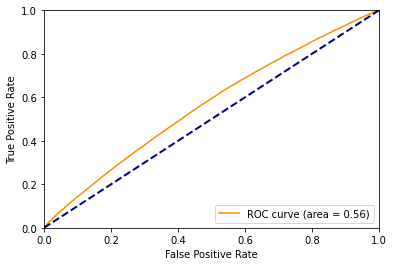

In [50]:
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()